In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()


# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement= Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set
recent_date=session.query(func.max(Measurement.date)).scalar()
ref_date=dt.datetime.strptime(recent_date,'%Y-%m-%d')
ref_date

datetime.datetime(2017, 8, 23, 0, 0)

In [10]:
last_12_months=ref_date-dt.timedelta(days=365)
results=session.query(Measurement).filter(
    Measurement.date >= last_12_months).all()
id=[]
station=[]
dates=[]
prcp=[]
tobs=[]
for result in results:
    id.append(result.id), 
    station.append(result.station),
    dates.append(result.date),
    prcp.append(result.prcp),
    tobs.append(result.tobs)
data={
    'id':id, 
    'station':station,
    'date':dates, 
    'precipitation':prcp,
    'tobs':tobs}
df=pd.DataFrame(data)
df['date']=df[['date']].apply(pd.to_datetime)
#df.set_index('date',inplace=True)

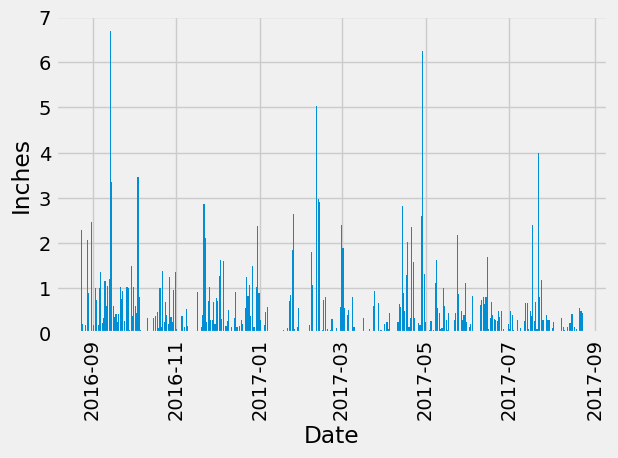

In [12]:
plt.bar(df['date'], df['precipitation'])
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['precipitation'].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
station_num=session.query(Measurement.station.distinct()).count()
station_num

9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations=session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()
def takeSecond(elem):
    return elem[1]
active_stations.sort(reverse=True, key=takeSecond)
for value, count in active_stations:
    print(f'{value}:{count}')

USC00519281:2772
USC00519397:2724
USC00513117:2709
USC00519523:2669
USC00516128:2612
USC00514830:2202
USC00511918:1979
USC00517948:1372
USC00518838:511


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[Measurement.station,
    func.max(Measurement.tobs),
    func.min(Measurement.tobs),
    func.avg(Measurement.tobs)
    ]
busy_station_temp=session.query(*sel).filter(
    Measurement.station=='USC00519281'
)
for row in busy_station_temp:
    print(row)

('USC00519281', 85.0, 54.0, 71.66378066378067)


Text(0, 0.5, 'Frequency')

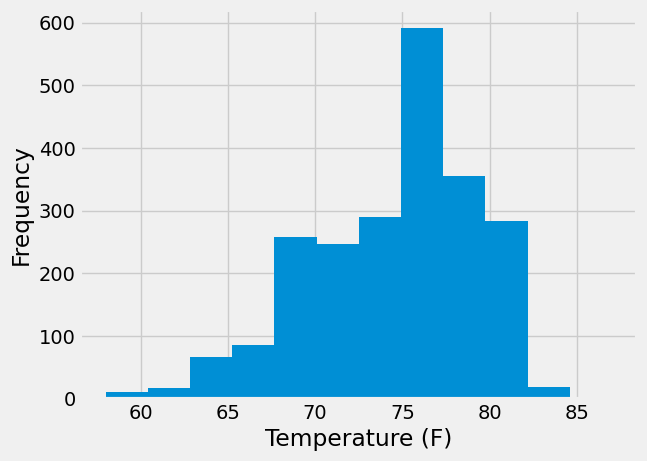

In [20]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
year_temps=session.query(Measurement.tobs).\
    filter(Measurement.station=='USC00519281').\
    filter(Measurement.date>= last_12_months).all()
temps_df=pd.DataFrame(year_temps)
plt.hist(df['tobs'], bins=12)
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')

# Close Session

In [23]:
# Close Session
session.close()